# ISM Module: Basics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import sys
sys.path.append('/Users/jeffrey/GoogleDrive/PulsarSignalSimulator/PulsarSimulator/')
import VersionZeroPointZero as PSS
#from VersionZeroPointZero.signal import Signal
#from VersionZeroPointZero.pulsar import Pulsar
#from VersionZeroPointZero.ism import ISM

In [2]:
Sig1 = PSS.Signal()
P1 = PSS.Pulsar(Sig1) #Intialize signal and pulsar

In [3]:
P1.make_pulses()
PreDispSig = np.array(P1.signal)

Above we need to save a copy of the signal as an array to archive what it looked like before we disperse it.

In [4]:
ism1 = PSS.ISM(Sig1) #ISM module takes signal as input

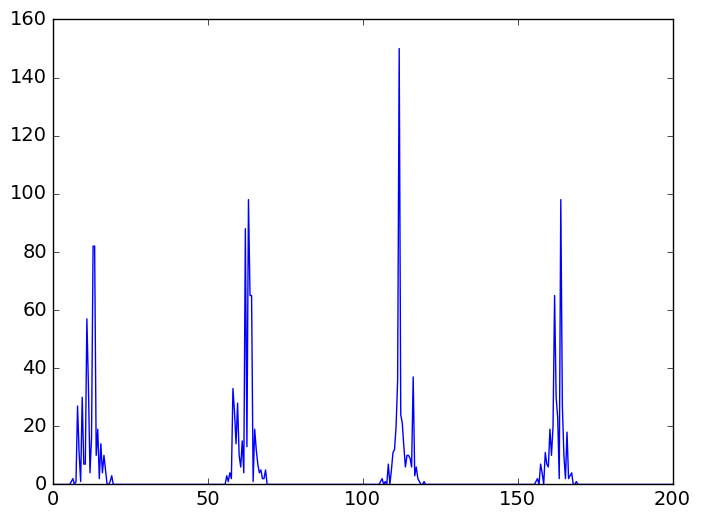

In [5]:
t = np.linspace(0,Sig1.TotTime,Sig1.Nt)
plt.plot(t, Sig1.signal[1,:])
plt.show()

Shift Theorem Function: The method below is used to shift the time of the arrays, given an input array and an integer to denote the number of bins to be shifted by. 

In [6]:
ism1.signal[1,:] = ism1.shiftit(ism1.signal[1,:],-12)

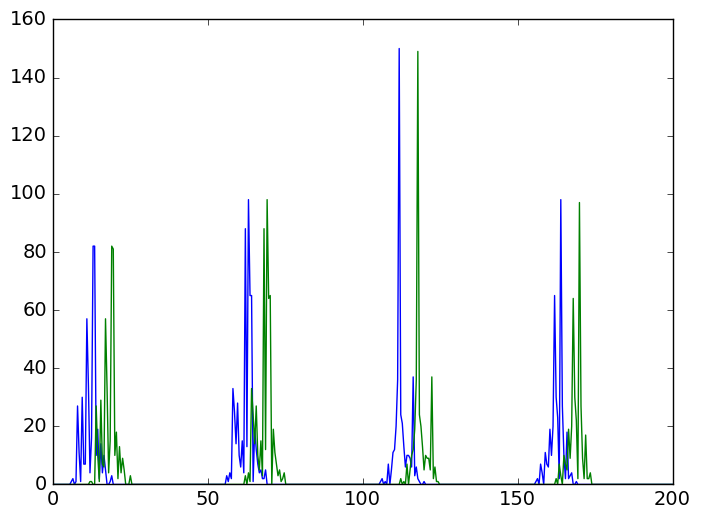

In [7]:
plt.plot(t,PreDispSig[1,:],t,ism1.signal[1,:])
plt.show()
ism1.signal[1,:] = ism1.shiftit(ism1.signal[1,:],12)

In [8]:
Sig2 = PSS.Signal()
P2 = PSS.Pulsar(Sig2)
P2.make_pulses()
ism2 = PSS.ISM(Sig2)
ism2.disperse(DM=10, to_DM_Broaden=True) #disperse(DM) Disperses frequency bins accordingly

In [9]:
print("Freq Bin Size=",ism2.freqBinSize) #Also calculated in the process
print("dispersion?", Sig2.MetaData.dispersion)
ism2.freq_Array

Freq Bin Size= 20.0
dispersion? True


array([ 1210.,  1230.,  1250.,  1270.,  1290.,  1310.,  1330.,  1350.,
        1370.,  1390.,  1410.,  1430.,  1450.,  1470.,  1490.,  1510.,
        1530.,  1550.,  1570.,  1590.])

In [11]:
ism2.time_delays #This comes out in number of bins...

array([-57., -55., -54., -52., -50., -49., -47., -46., -45., -43., -42.,
       -41., -40., -39., -38., -37., -36., -35., -34., -33.])

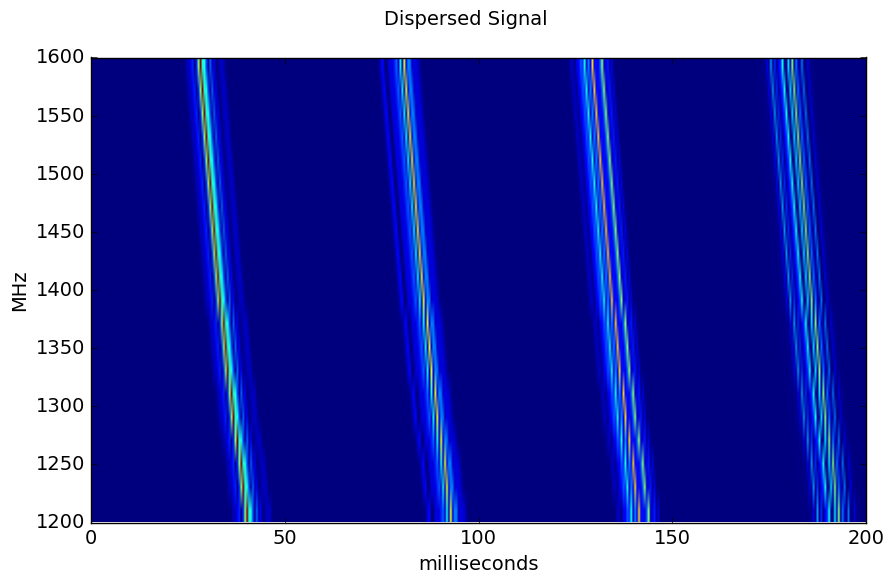

In [12]:
plt.figure(figsize=(10,6))
plt.suptitle("Dispersed Signal")
plt.imshow(ism2.signal, origin='lower',extent=[0,Sig2.TotTime,ism2.first_freq,ism2.last_freq],aspect='auto')
plt.xlabel('milliseconds')
plt.ylabel('MHz')
plt.show() #Dispersed Signal . Note that currently, this is not in baseband.

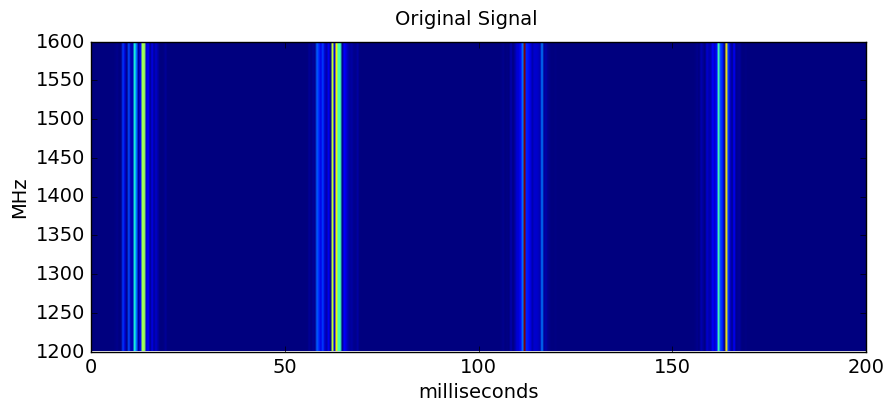

In [13]:
plt.figure(figsize=(10,4))
plt.suptitle("Original Signal")
plt.imshow(PreDispSig, origin='lower',extent=[0,Sig1.TotTime,ism1.first_freq,ism1.last_freq],aspect='auto')
plt.xlabel('milliseconds')
plt.ylabel('MHz')
plt.show() # Original Signal

In [14]:
Sig2.MetaData.DM

10